# EDA research 1
In this exploratory data analysis, we are gonna explore the dataset to identify the following:
1. Check the features and target probability distributions and weather is balanced.
2. If Unbalanced, use oversampling technique SMOTE to balance it out.
3. Take a look at the correlation of `is_fraud` vs all the features, before and after oversampling.

In [1]:
### Import the necessary modules
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the root project path
root_project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

#Append it to sys
sys.path.append(root_project_path)

#Import the necessary modules
from utils import DataLoader, CreditCardPreprocesser

### Load the data and obtain the preprocessed dataset

In [2]:
#Set the folder name and data folder
folder_name = "data"
data_holder_path = os.path.join(os.getcwd(), os.pardir)

#Set the folder name
data_loader = DataLoader(data_folder_name=folder_name,\
    data_folder_path=data_holder_path)

#Get the data
df_data = data_loader.get_dataset()

#Create an instance of the Credit card processer
credit_card_processer = CreditCardPreprocesser(df_data=df_data)

#Obtain the df_preprocessed
df_preprocessed = credit_card_processer.fetch_preprocessed_dataframe()

In [3]:
df_preprocessed.shape

(1296675, 96)

In [4]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 96 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296675 non-null  int64  
 1   amt                      1296675 non-null  float64
 2   gender                   1296675 non-null  int64  
 3   zip                      1296675 non-null  int64  
 4   lat                      1296675 non-null  float64
 5   long                     1296675 non-null  float64
 6   city_pop                 1296675 non-null  int64  
 7   unix_time                1296675 non-null  int64  
 8   merch_lat                1296675 non-null  float64
 9   merch_long               1296675 non-null  float64
 10  is_fraud                 1296675 non-null  int64  
 11  merch_zipcode            1296675 non-null  float64
 12  transaction_year         1296675 non-null  int32  
 13  transaction_month        1296675 non-null 

### Lets select the X and Y target

In [5]:
X: pd.DataFrame = df_preprocessed[[col for col in df_preprocessed.columns if col != "is_fraud"]]
y: pd.DataFrame = df_preprocessed["is_fraud"]

In [6]:
X.head()

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,first_encoded,first_freq,last_encoded,last_freq,street_encoded,street_freq,city_encoded,city_freq,job_encoded,job_freq
0,2703186189652095,4.97,1,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,...,0.007261,16940,0.000000,2028,0.000000,2028,0.000000,2028,0.001693,3545
1,630423337322,107.23,1,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,...,0.003559,10678,0.002633,3038,0.000000,3030,0.000000,3545,0.002157,5099
2,38859492057661,220.11,0,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,...,0.001288,3106,0.008763,7075,0.000000,503,0.000000,503,0.015656,511
3,3534093764340240,45.00,0,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,...,0.010373,7134,0.006576,7147,0.030426,493,0.030426,493,0.007905,2530
4,375534208663984,41.96,0,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,...,0.001805,6647,0.008709,9186,0.000000,2017,0.000000,2017,0.000000,2017


### Lets see the distribution of the target variable 

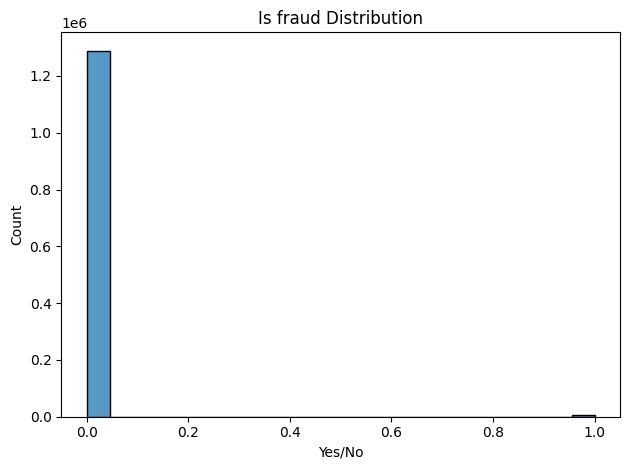

In [7]:
fig, axs = plt.subplots(1)

# first plot - Histogram with KDE
sns.histplot(df_preprocessed["is_fraud"], ax=axs)
axs.set_title('Is fraud Distribution')
axs.set_xlabel('Yes/No')
plt.tight_layout()  # adjusts the spacing of histograms
plt.show()

### This is indicative that is indeed unbalanced...

In [8]:
y.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

### Imbalanced dataset!

Yup! Its pretty obvious we have an imbalanced dataset for our target variable. This would greatly bias our model to identify more times it is not fraud, than its actually fraud. We need to perform the following:
1. We would need to oversample the 1s here, for both the X and y target.
2. We would take a look of the oversample data distributions

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [10]:
#Obtain the over sampled new values
X_smote, y_smote = smote.fit_resample(X.astype("float"), y)

### Lets take a look at the new smoted data vs original data

In [11]:
X_smote.head(5)

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,first_encoded,first_freq,last_encoded,last_freq,street_encoded,street_freq,city_encoded,city_freq,job_encoded,job_freq
0,2.703186e+15,4.97,1.0,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,...,0.007261,16940.0,0.000000,2028.0,0.000000,2028.0,0.000000,2028.0,0.001693,3545.0
1,6.304233e+11,107.23,1.0,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,...,0.003559,10678.0,0.002633,3038.0,0.000000,3030.0,0.000000,3545.0,0.002157,5099.0
2,3.885949e+13,220.11,0.0,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,...,0.001288,3106.0,0.008763,7075.0,0.000000,503.0,0.000000,503.0,0.015656,511.0
3,3.534094e+15,45.00,0.0,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,...,0.010373,7134.0,0.006576,7147.0,0.030426,493.0,0.030426,493.0,0.007905,2530.0
4,3.755342e+14,41.96,0.0,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,...,0.001805,6647.0,0.008709,9186.0,0.000000,2017.0,0.000000,2017.0,0.000000,2017.0


C:\Users\ajedr\AppData\Local\Temp\ipykernel_19720\3031589483.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


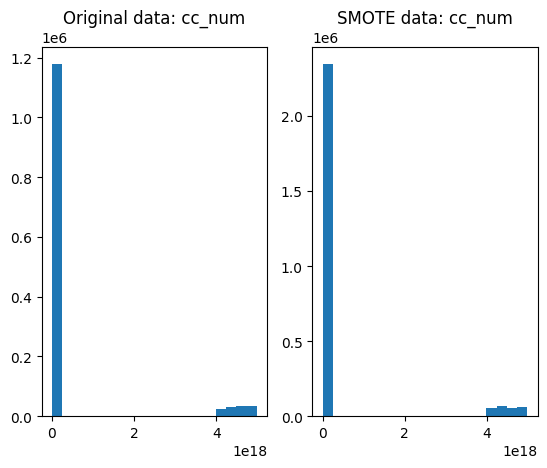

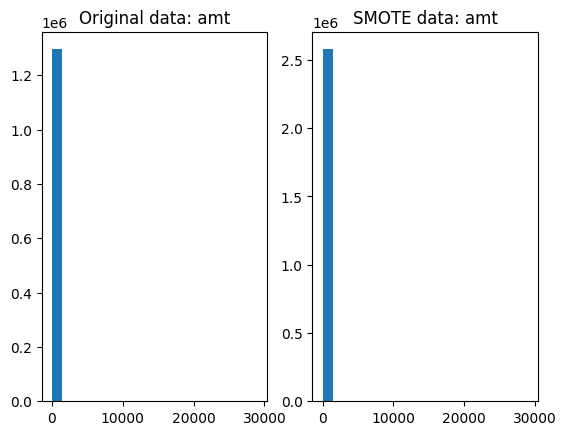

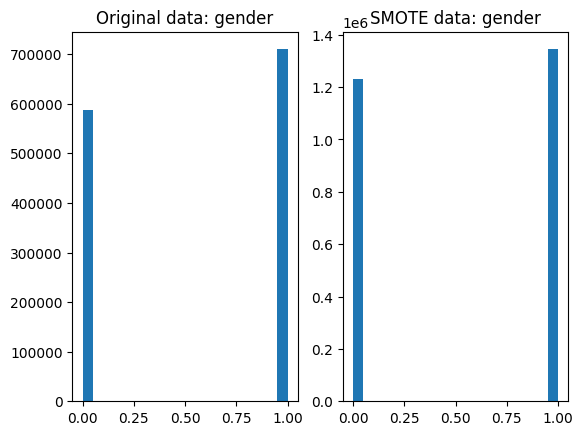

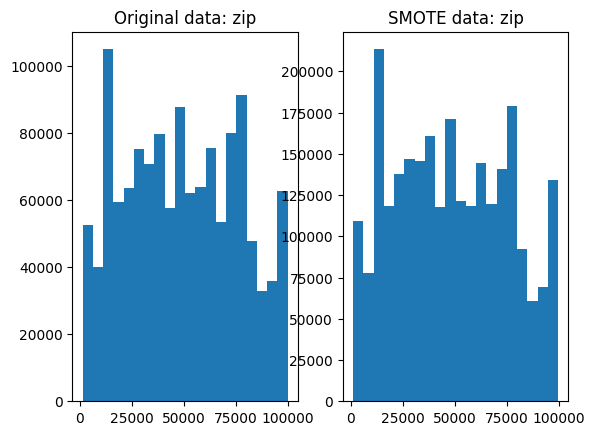

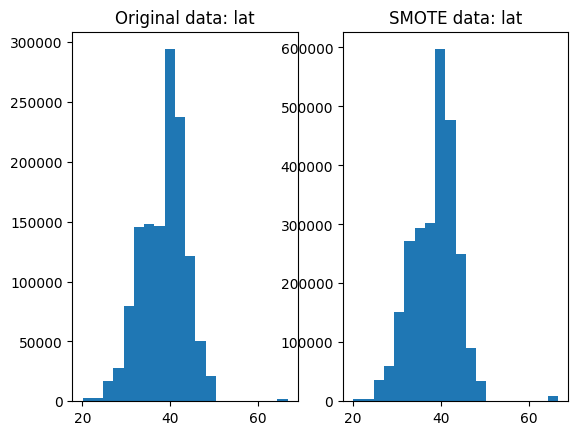

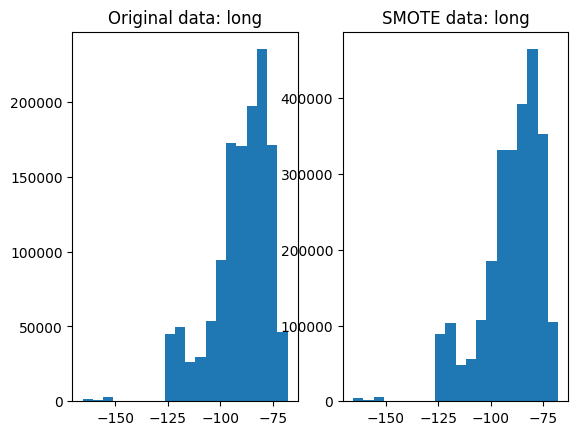

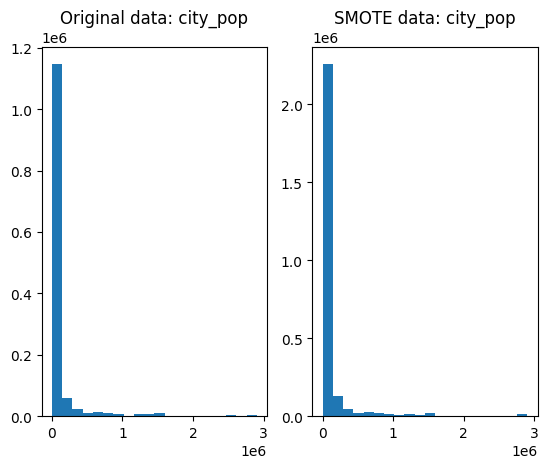

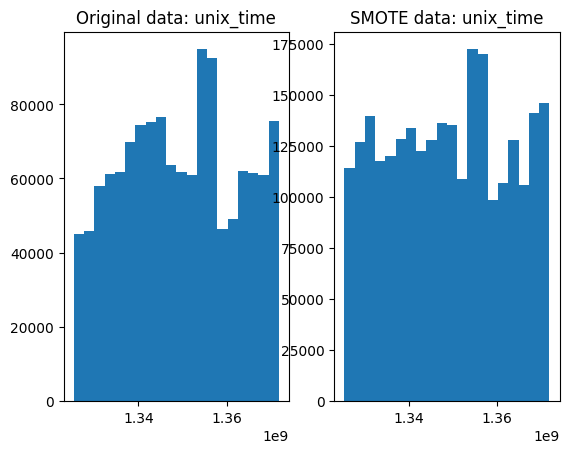

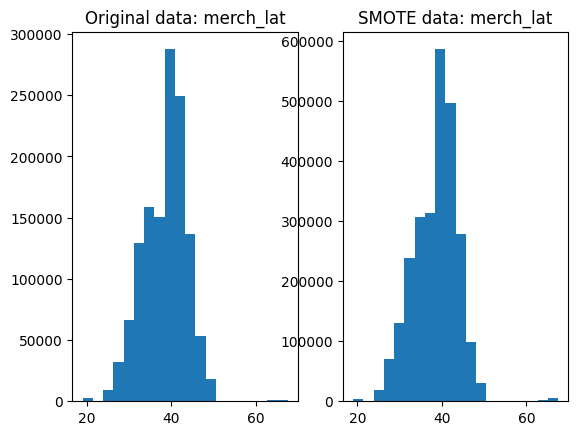

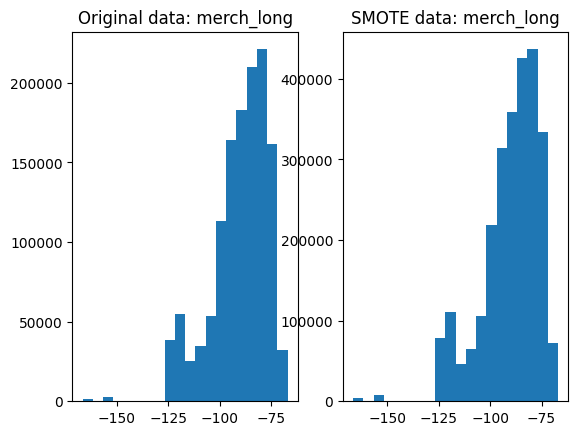

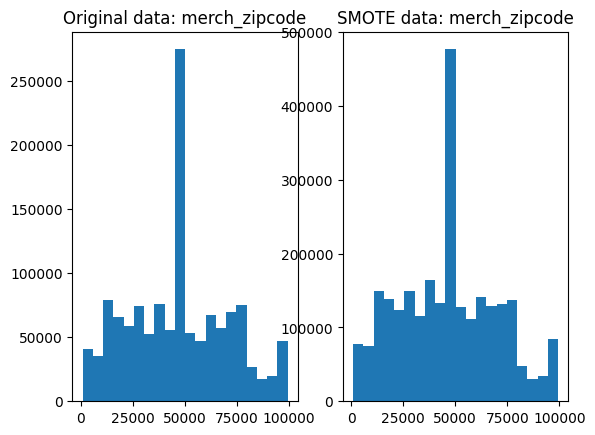

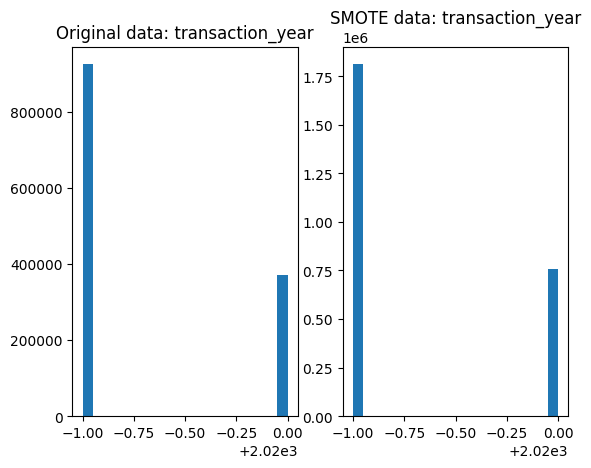

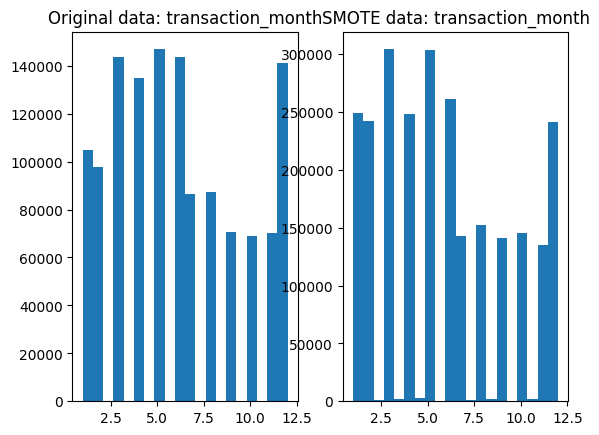

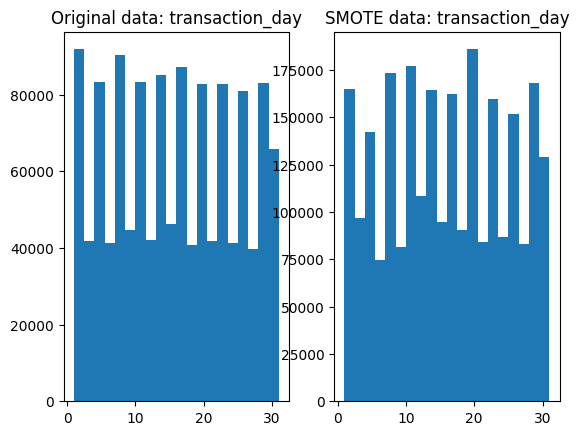

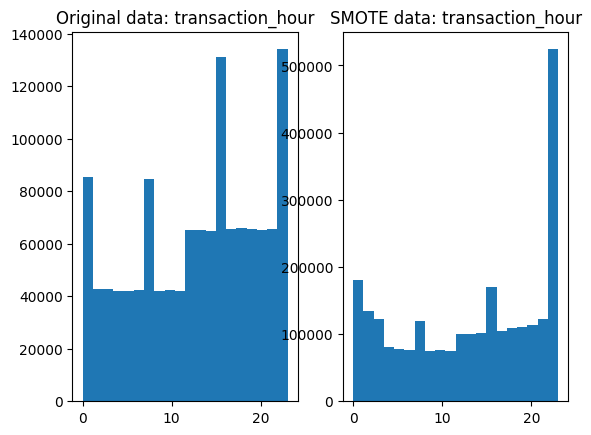

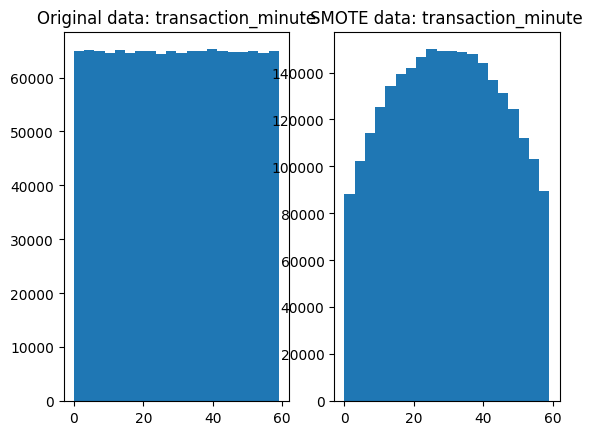

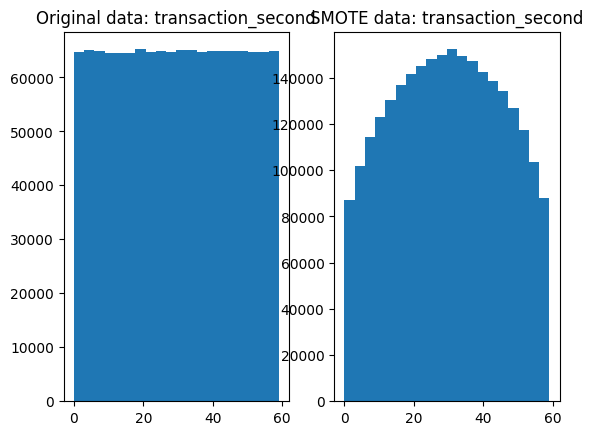

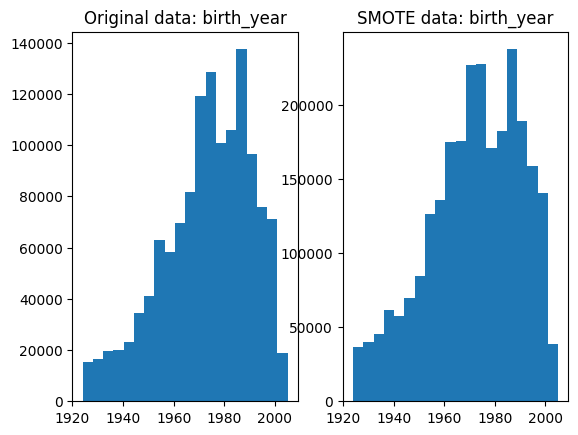

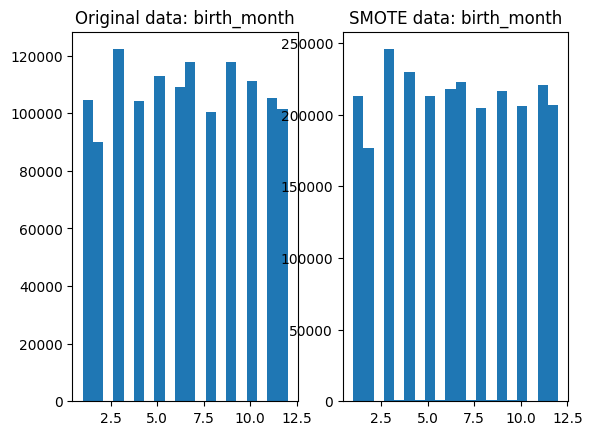

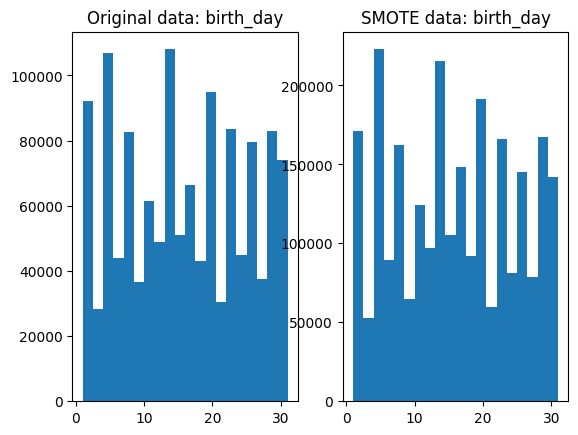

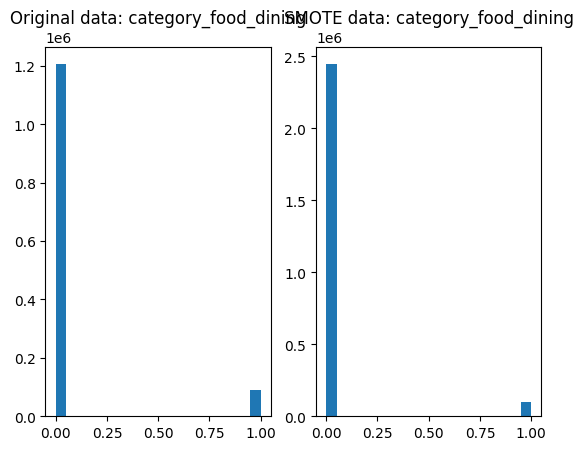

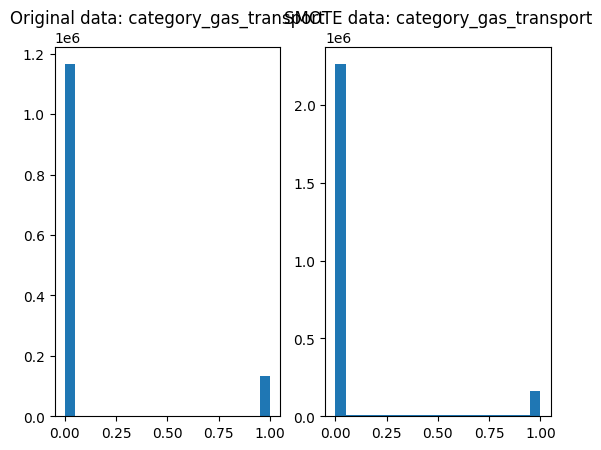

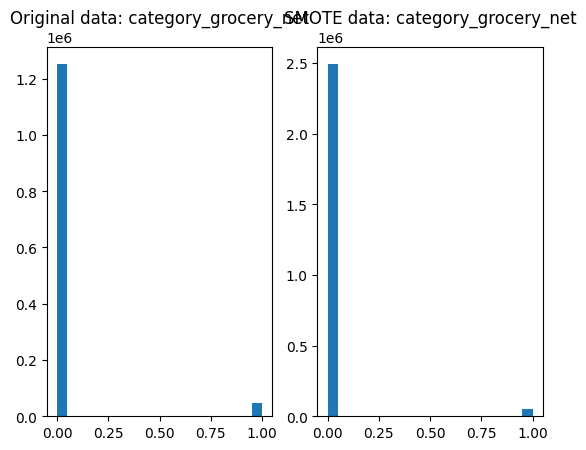

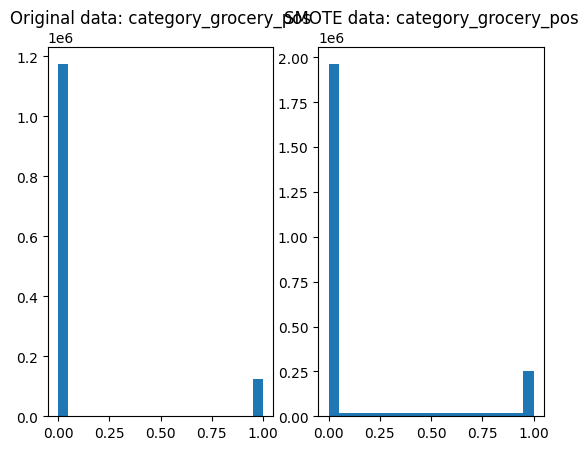

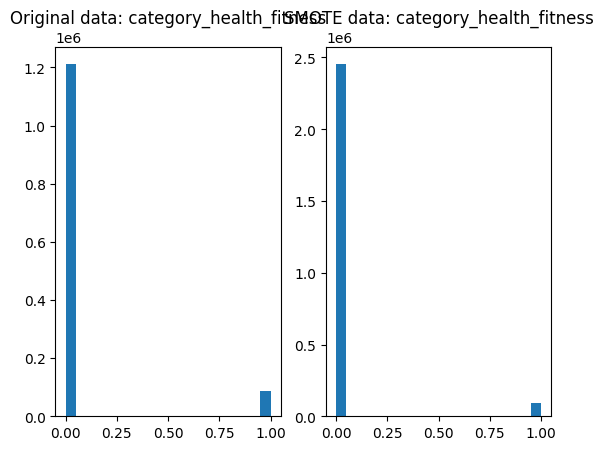

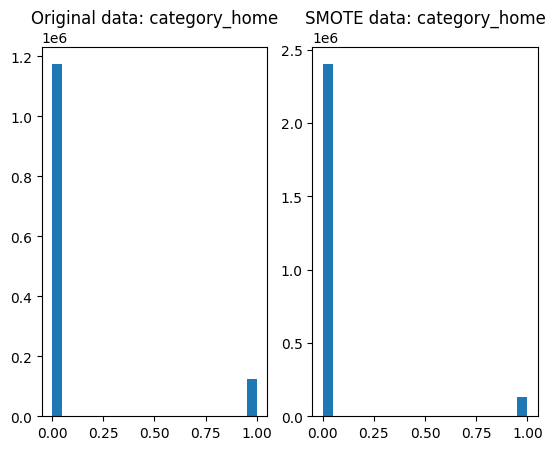

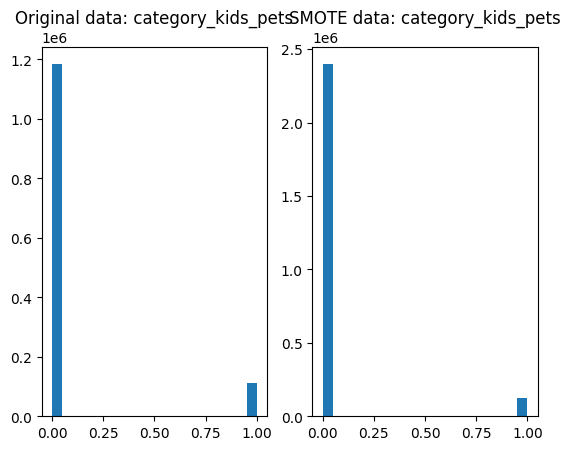

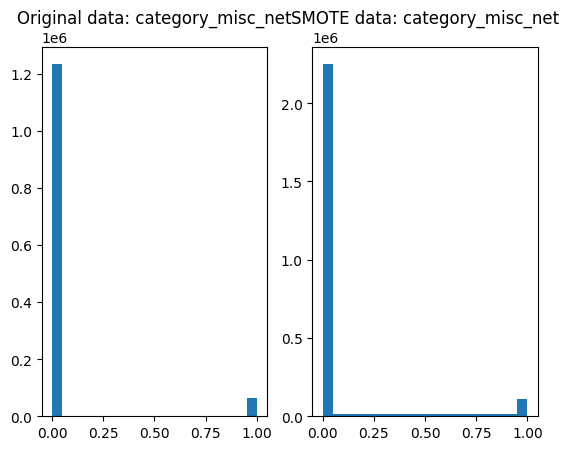

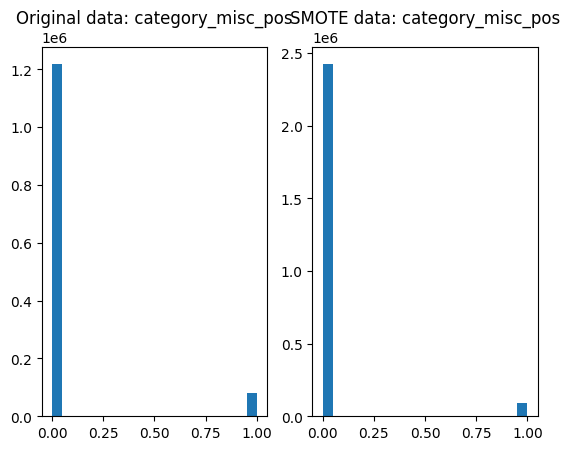

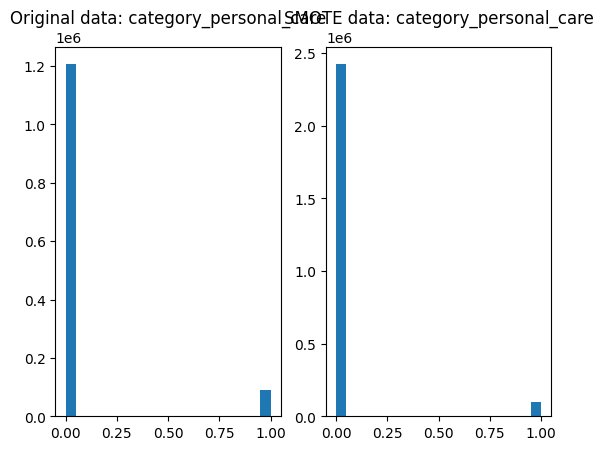

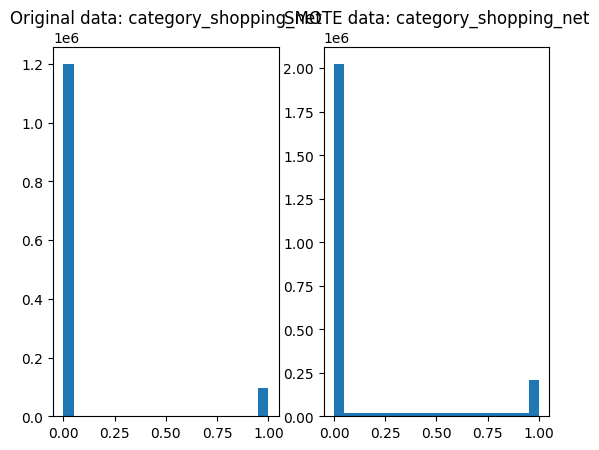

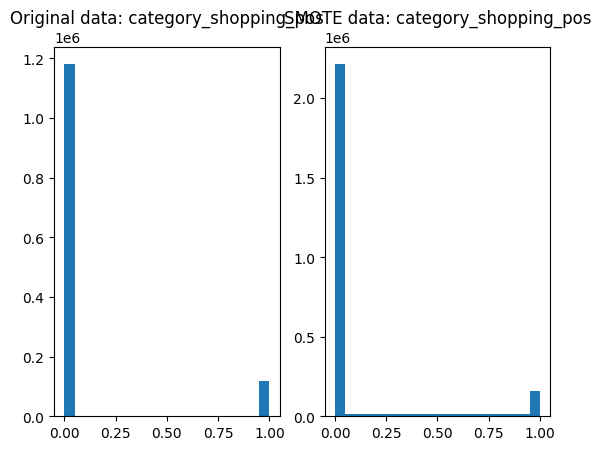

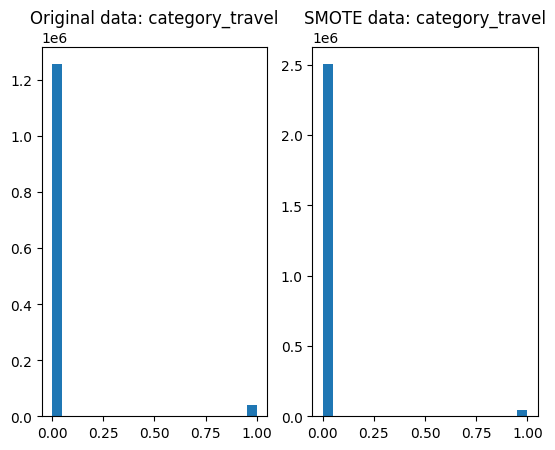

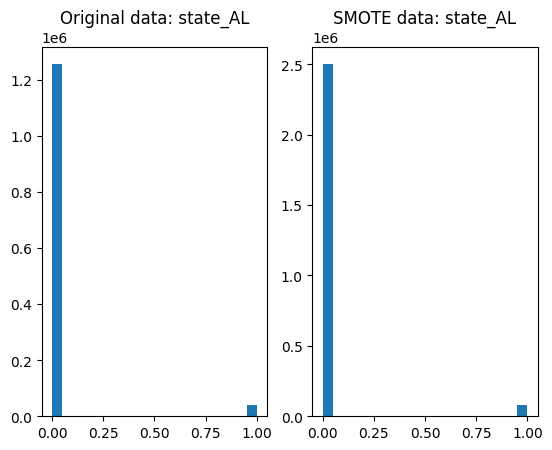

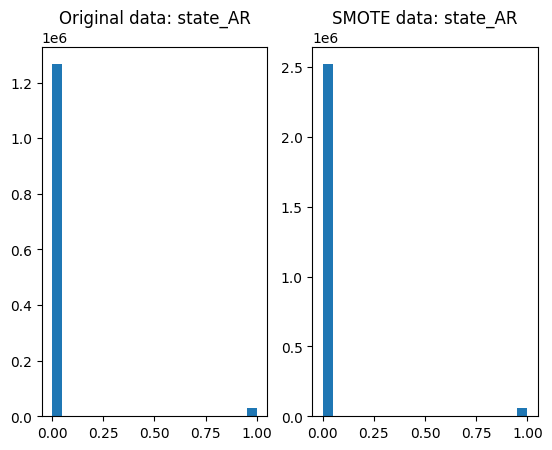

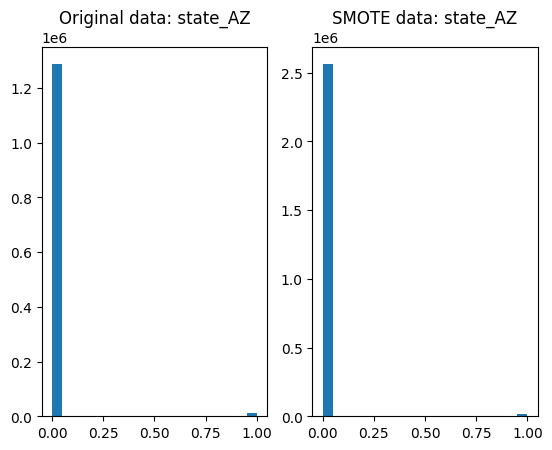

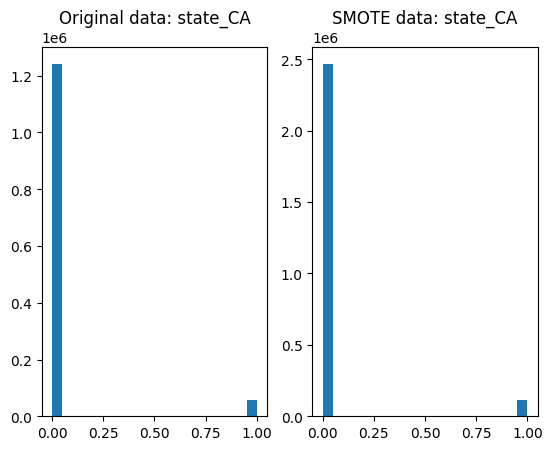

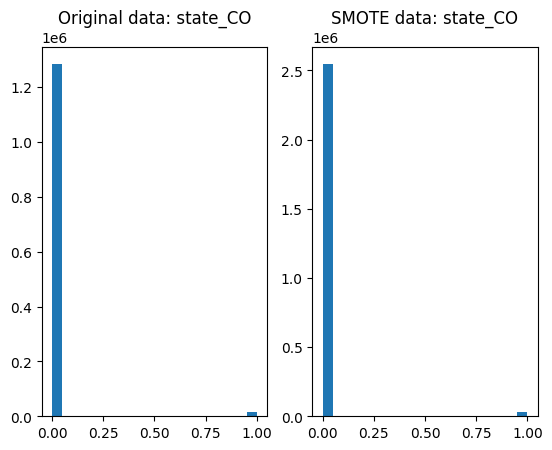

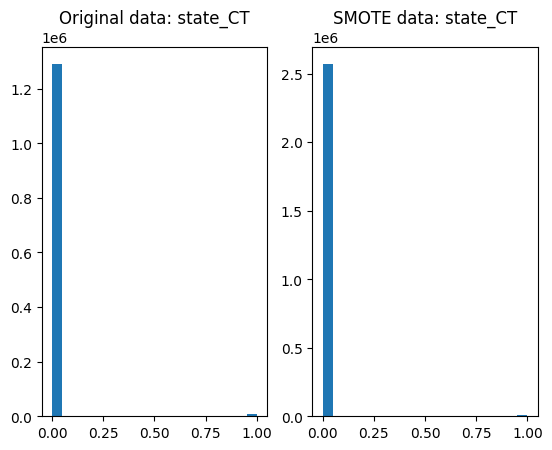

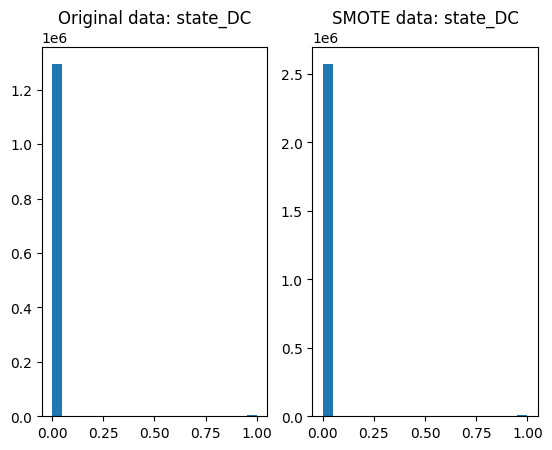

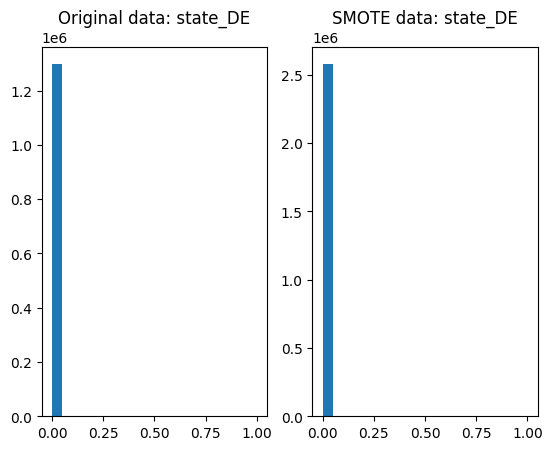

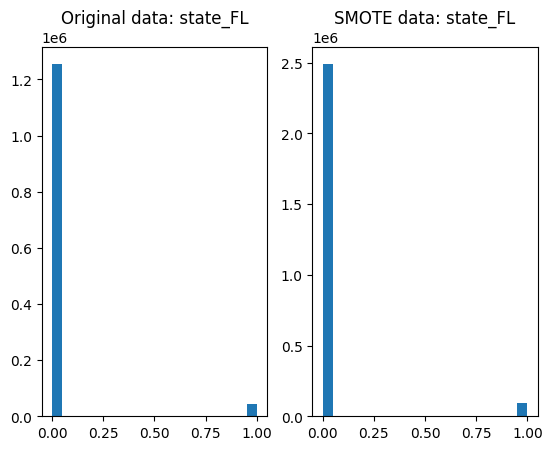

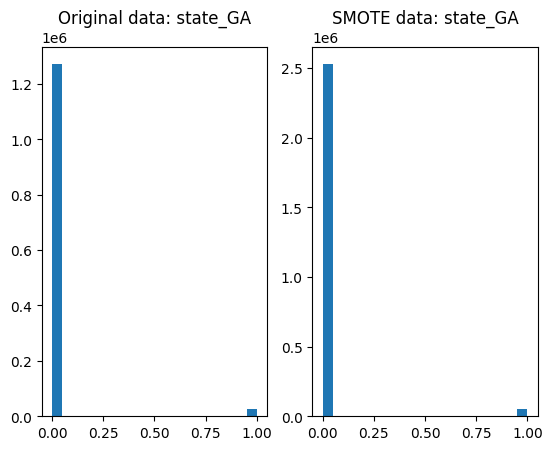

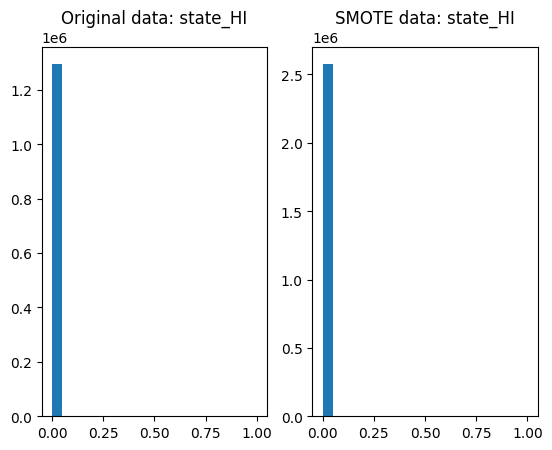

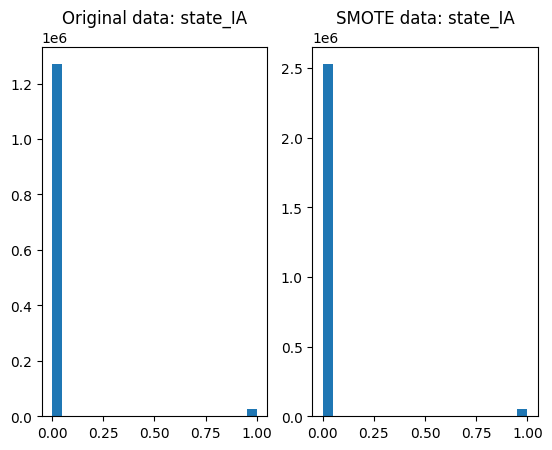

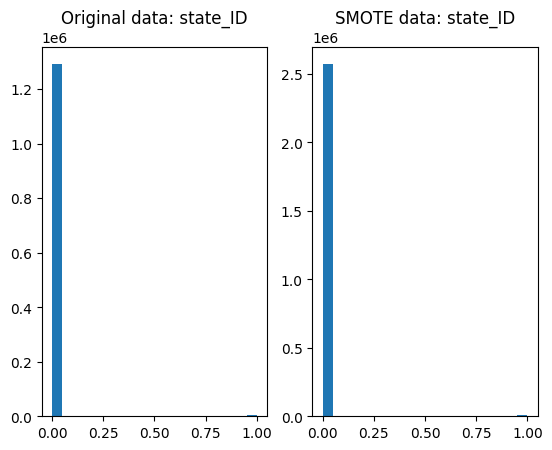

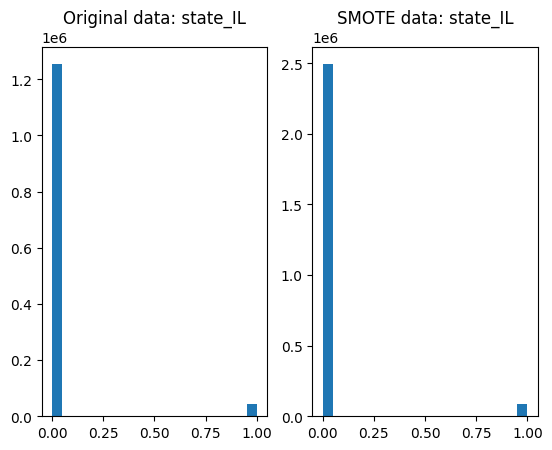

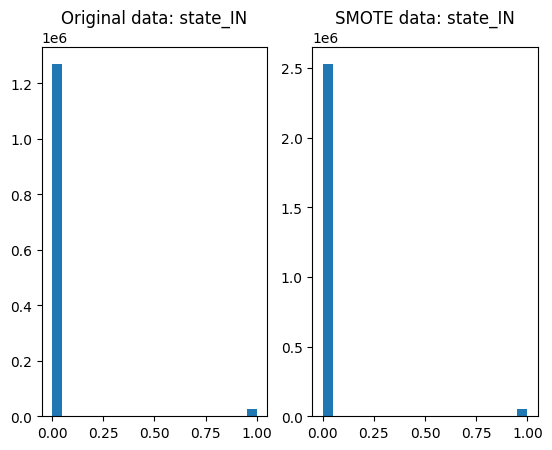

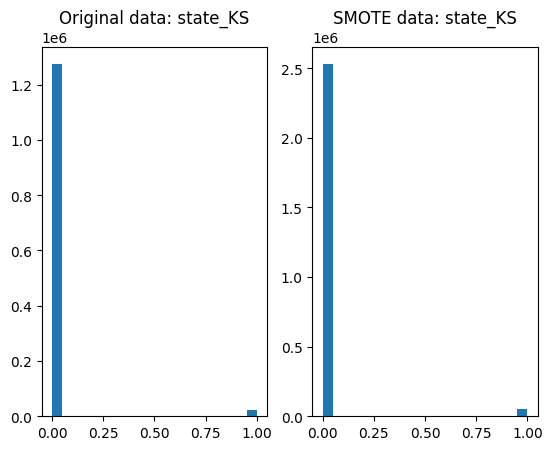

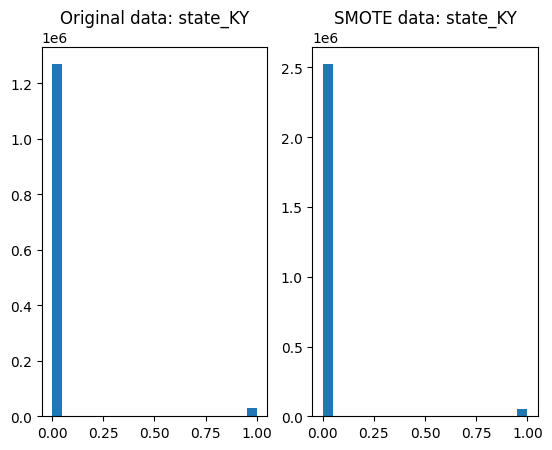

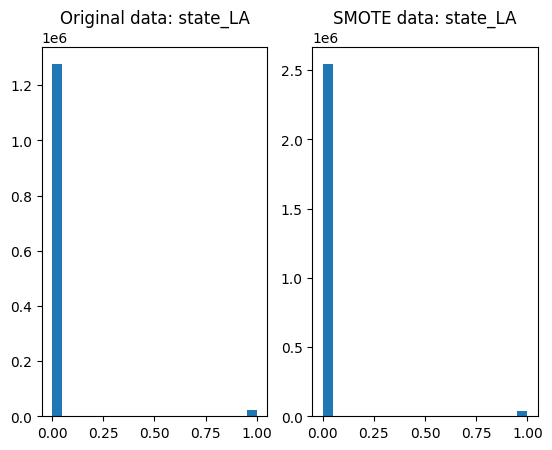

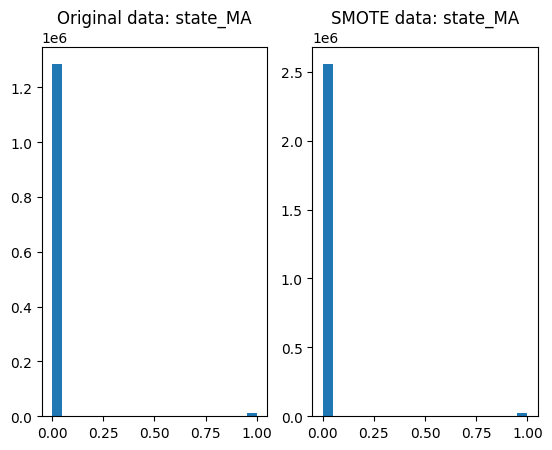

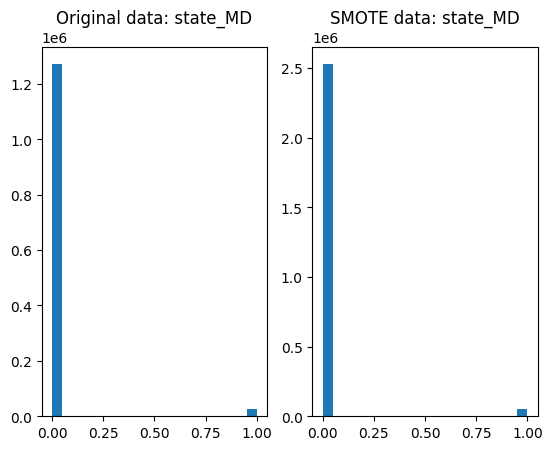

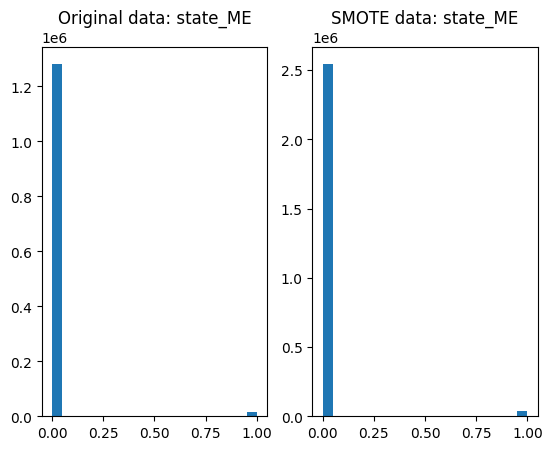

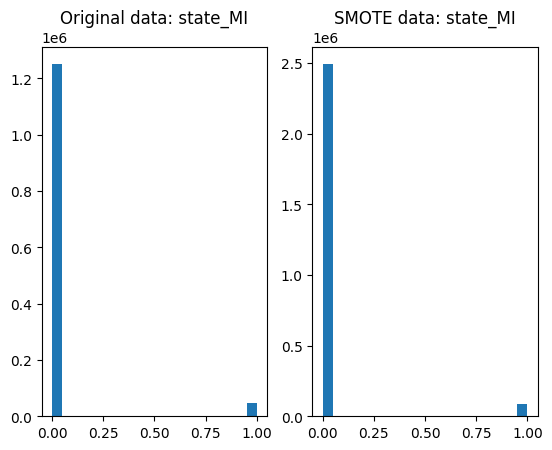

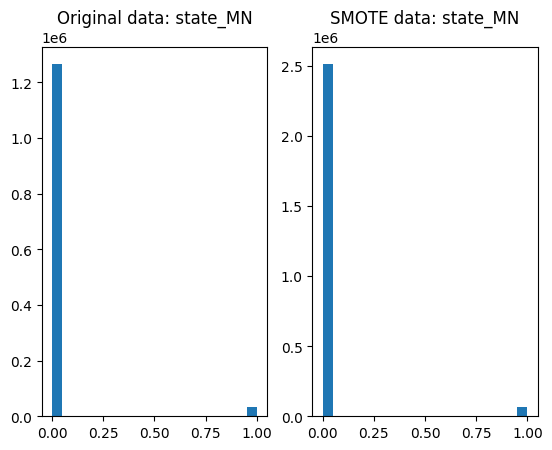

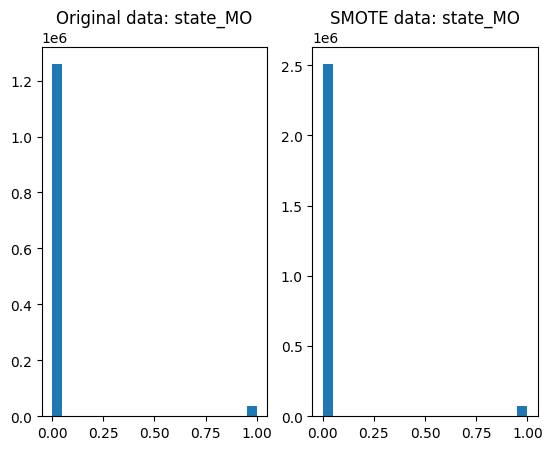

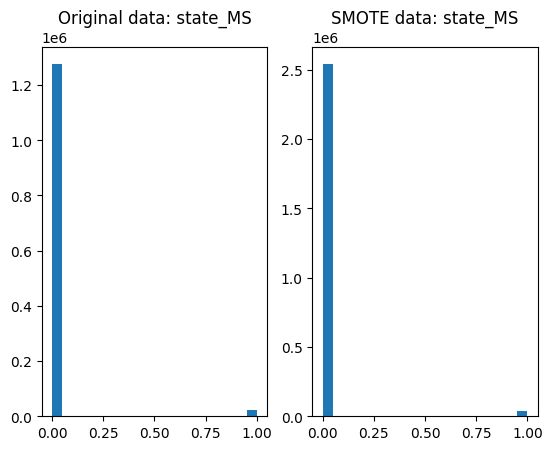

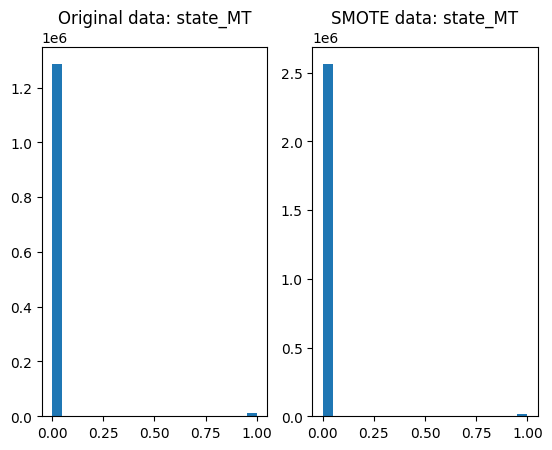

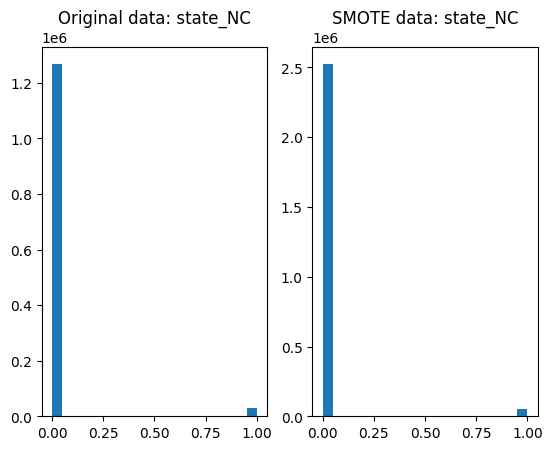

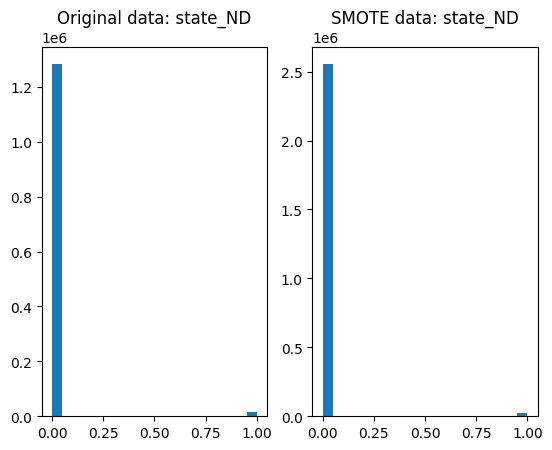

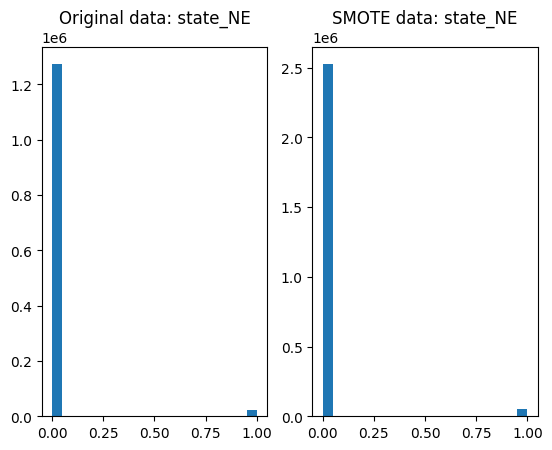

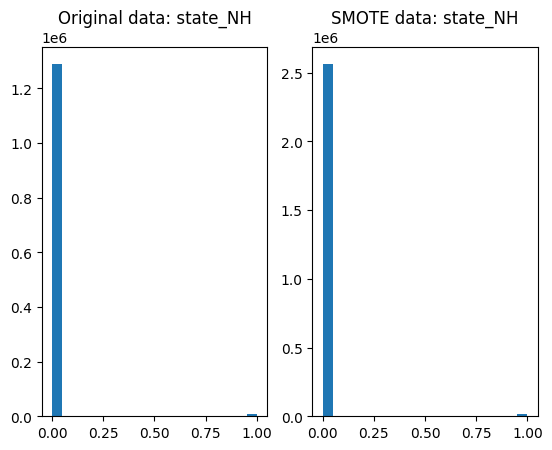

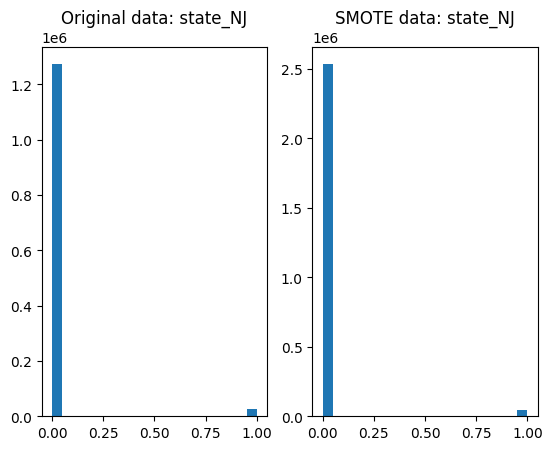

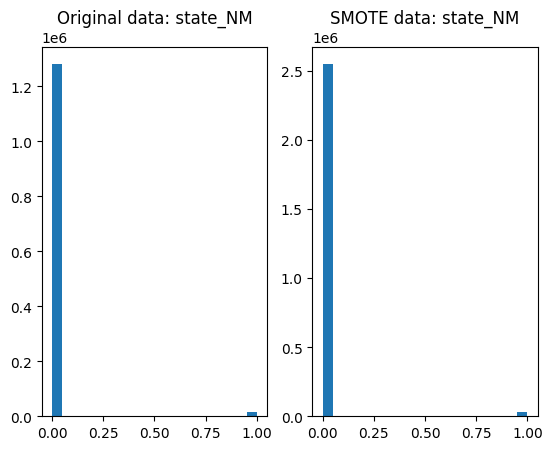

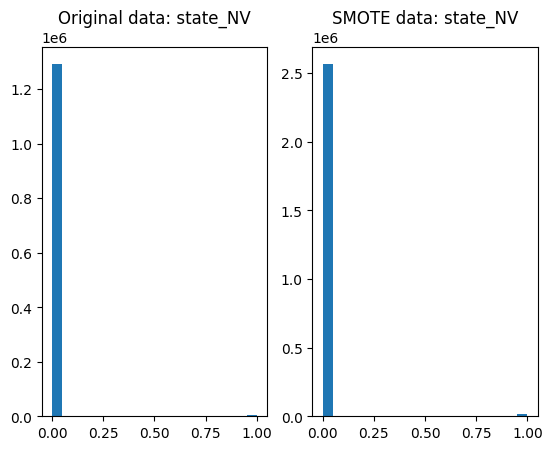

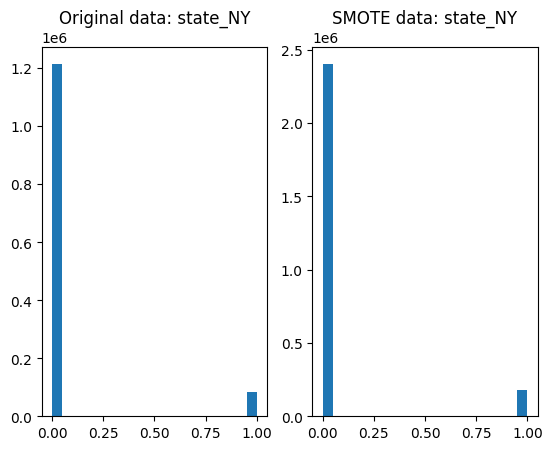

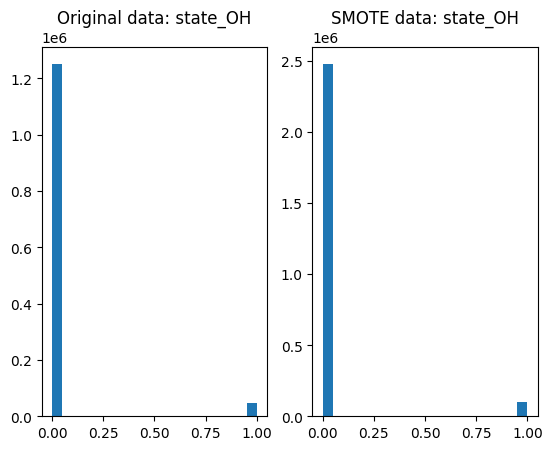

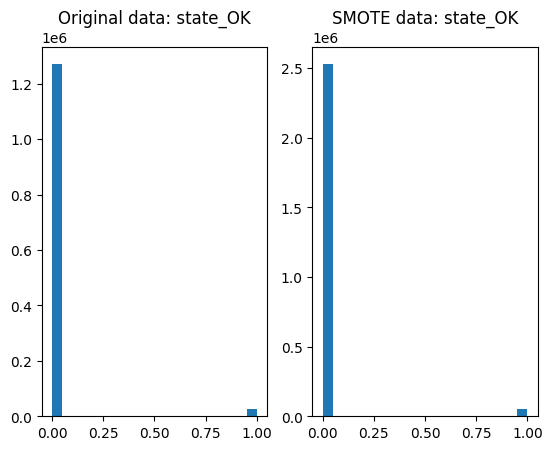

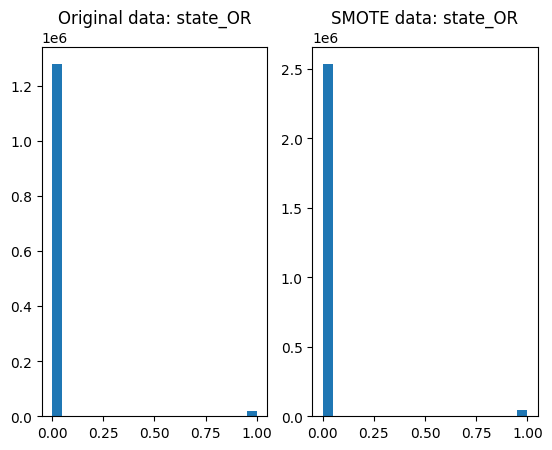

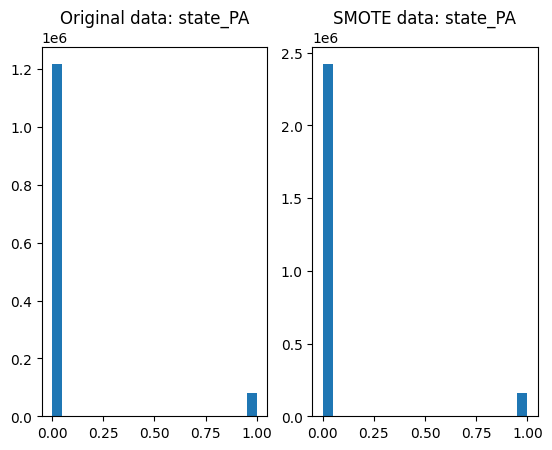

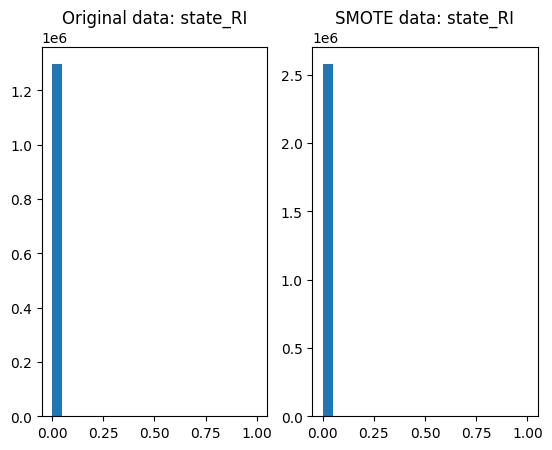

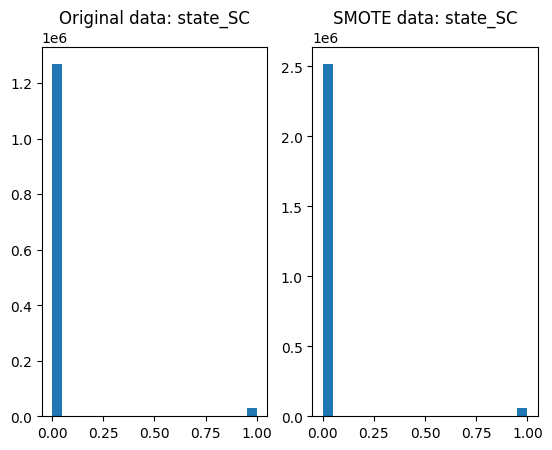

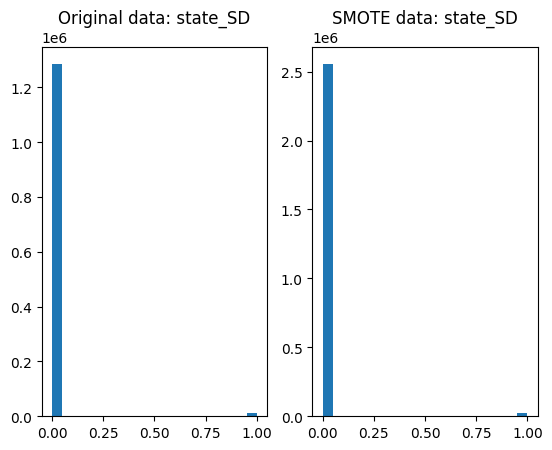

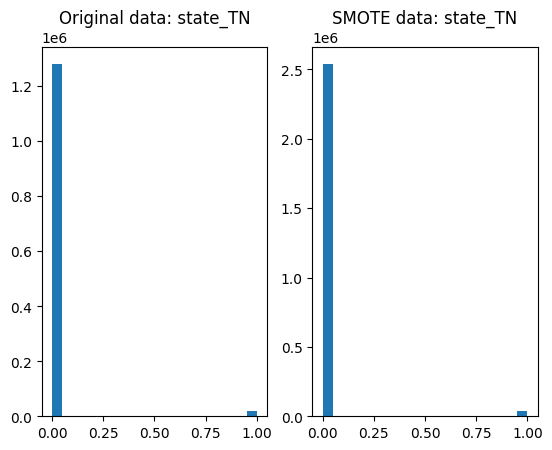

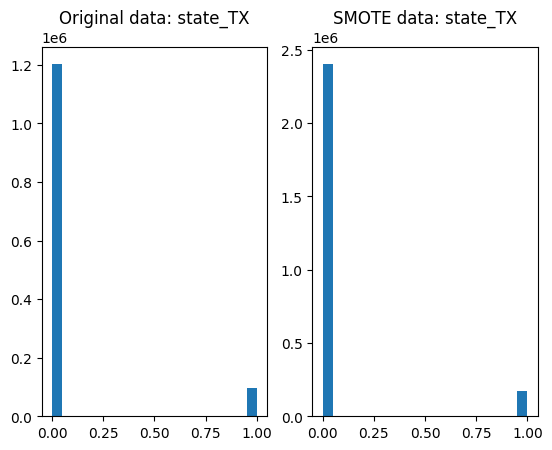

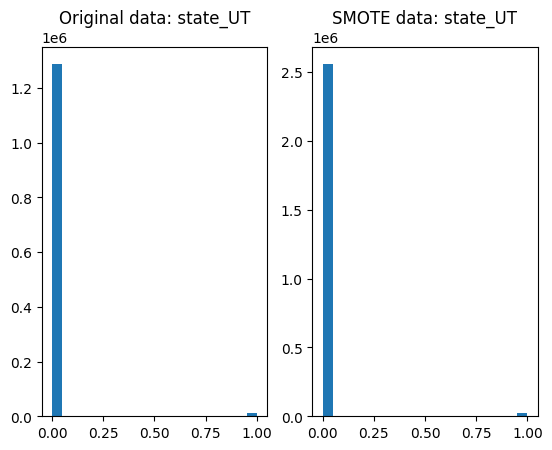

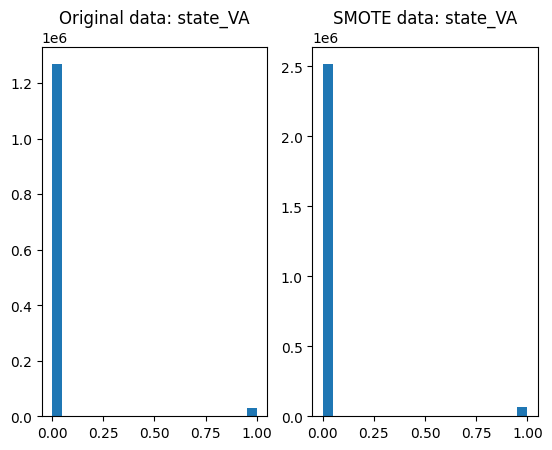

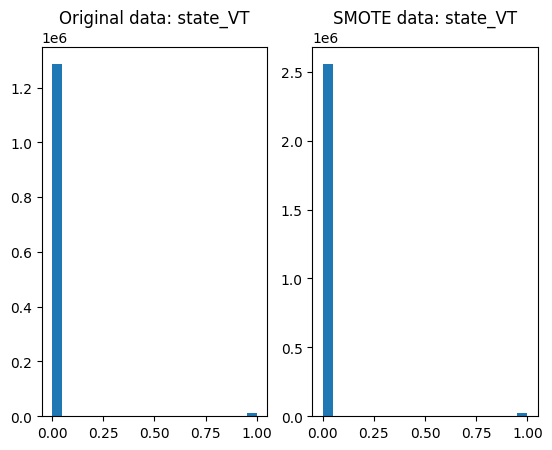

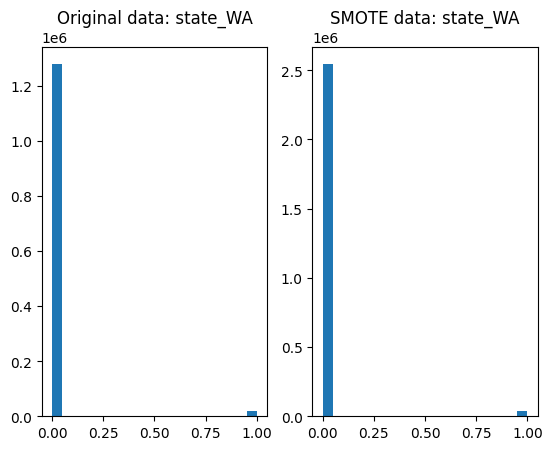

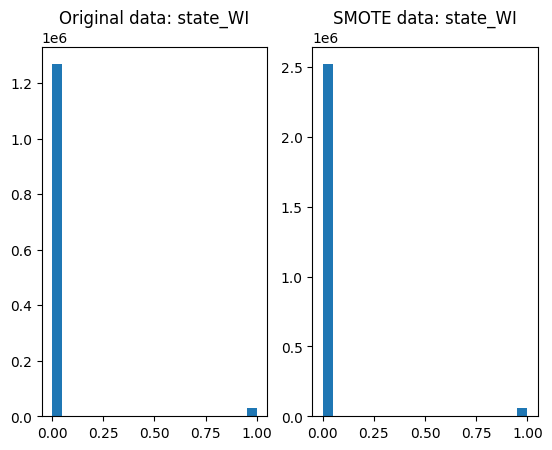

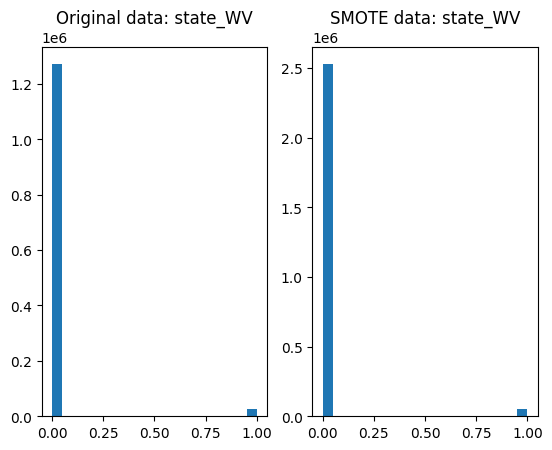

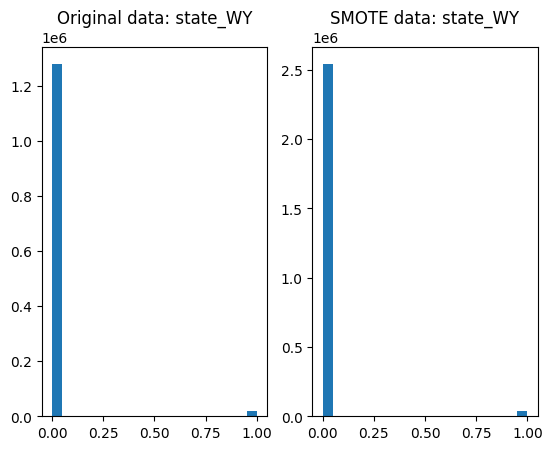

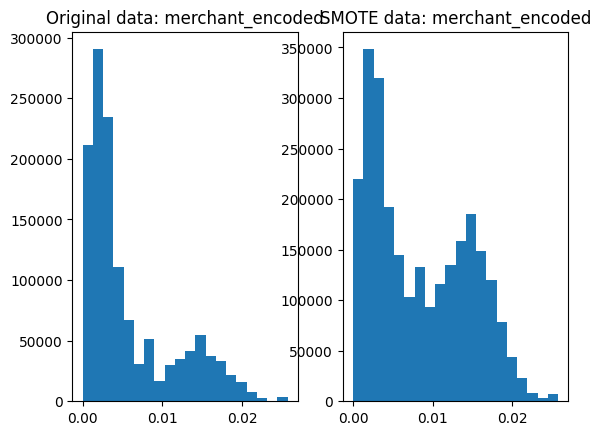

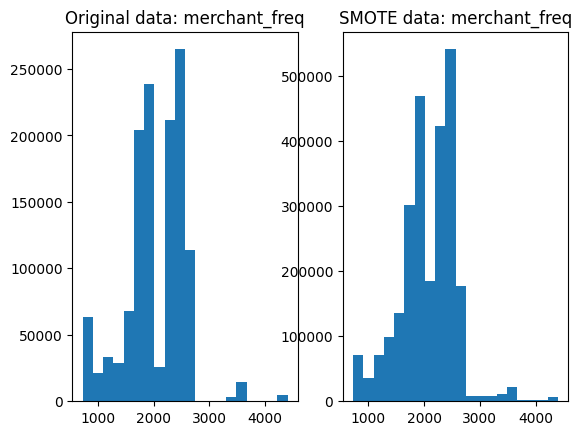

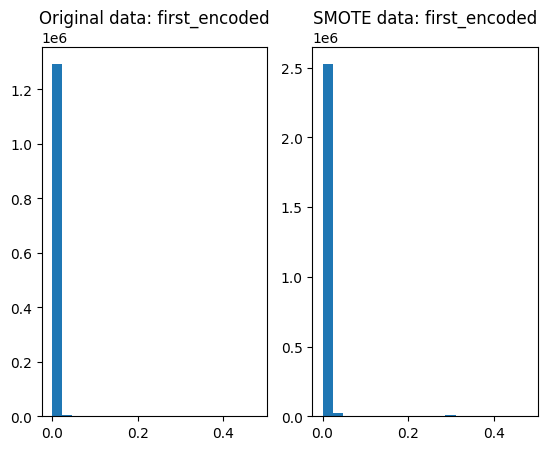

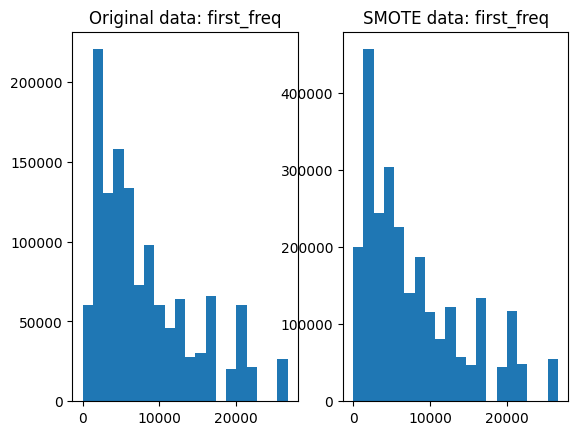

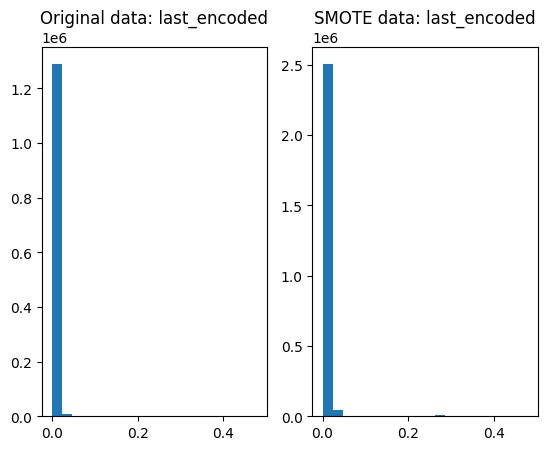

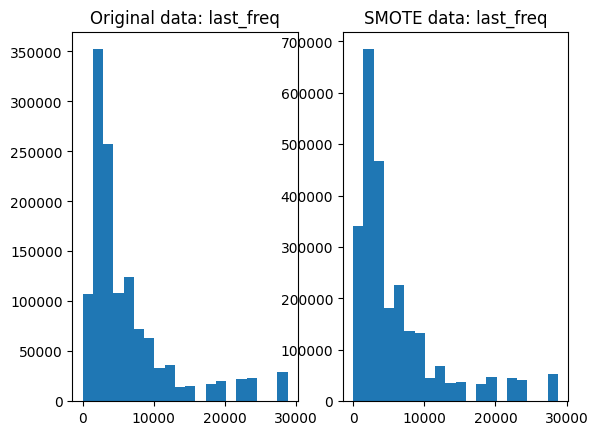

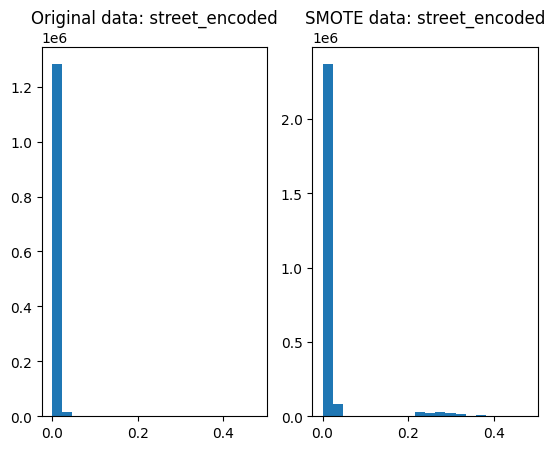

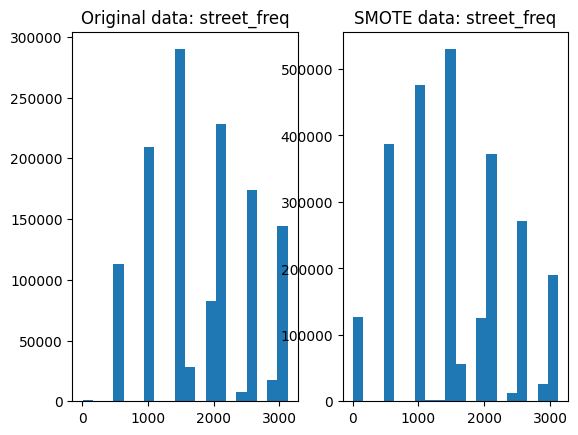

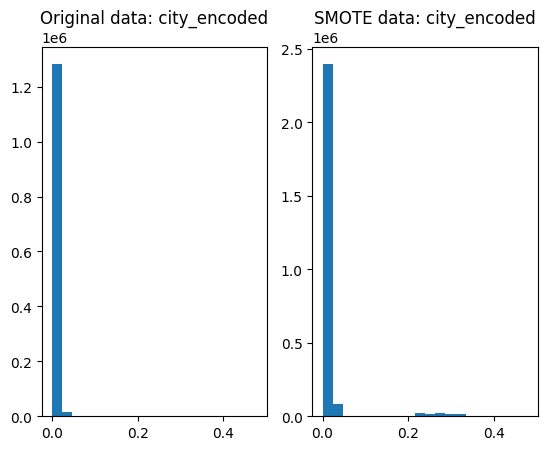

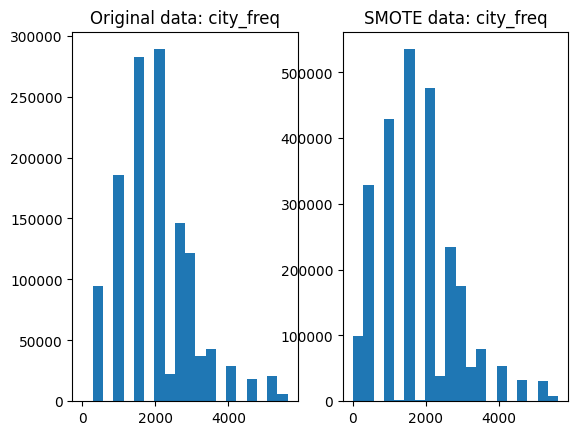

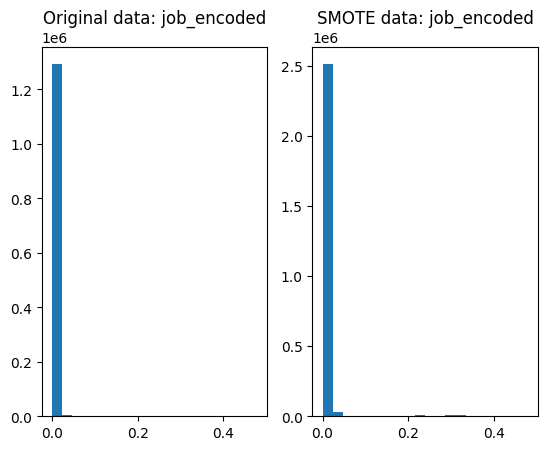

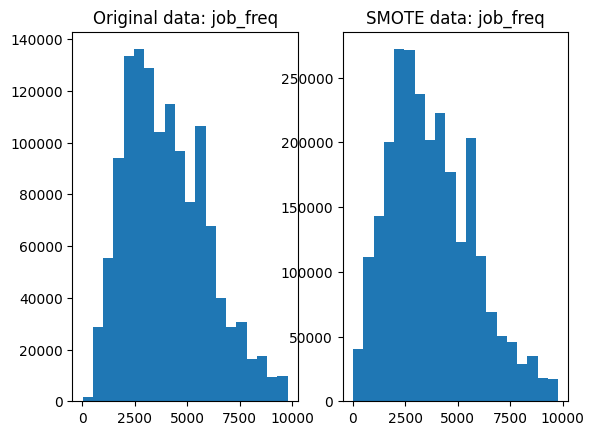

In [12]:
def create_histogram(data_1, data_2, col, num):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.hist(data_1, bins = num)
    plt.title(f"Original data: {col}")
    plt.subplot(1, 2, 2)
    plt.hist(data_2, bins = num)
    plt.title(f"SMOTE data: {col}")

for c in X_smote.columns:
    create_histogram(X[c], X_smote[c], c, num=20)

### Key remarks of smoting vs not smoting in x features:
Its interesting to see the effect of smoting untransformed X features; but key things are appearing.
1. Overall, most of the majority of the features maintained the same probability distribution before and after oversampling.
2. For square distributions, SMOTE made them a little but more gaussian: `transaction_time`, `transaction_minute`.
3. Its obvious we have skewed features here: We need to standardize most of them so they can be used for proper training.
4. We would scale THE not binary features, those that are continous.

In [13]:
#Nice
print(X_smote.shape)
print(y_smote.shape)

(2578338, 95)
(2578338,)


In [14]:
from collections import Counter
print(f"Before SMOTE: {Counter(y.to_numpy().flatten())}")
print(f"After SMOTE: {Counter(y_smote.to_numpy().flatten())}")

Before SMOTE: Counter({0: 1289169, 1: 7506})
After SMOTE: Counter({0: 1289169, 1: 1289169})


### Lets look at the correlation matrix before and after smoting

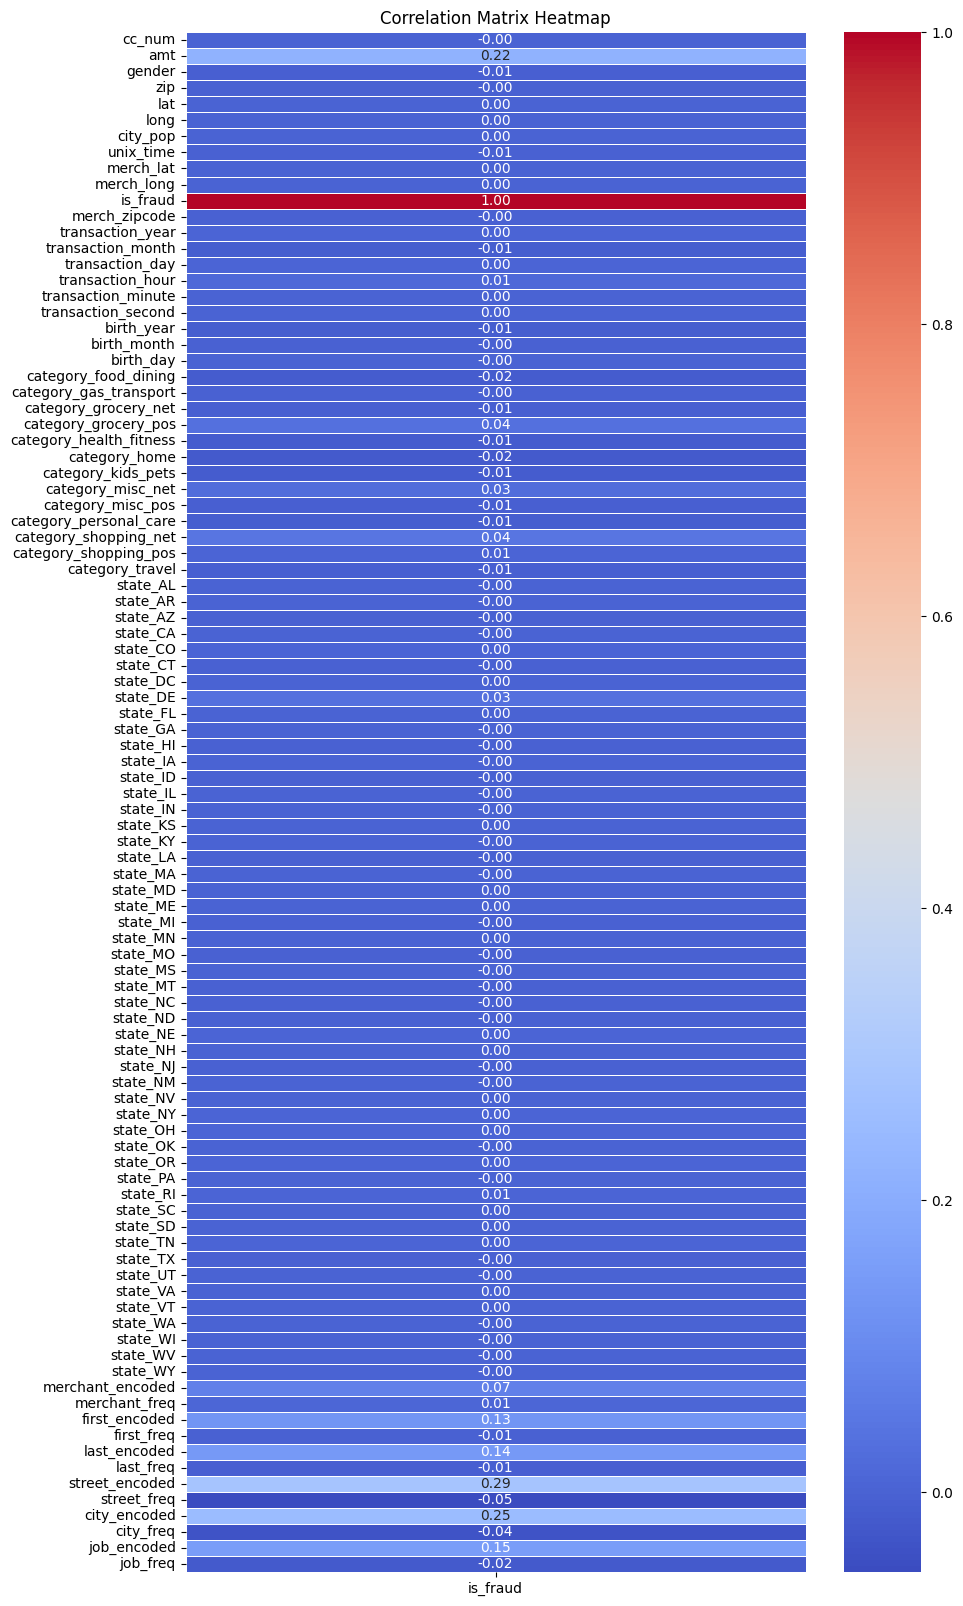

In [19]:
import numpy as np

# Visualize the correlation matrix excluding non-numeric columns
correlation_matrix = df_preprocessed.corr()

# Filter to only the 'is_fraud' column
is_fraud_corr = correlation_matrix[['is_fraud']]

plt.figure(figsize=(10, 20))
sns.heatmap(is_fraud_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

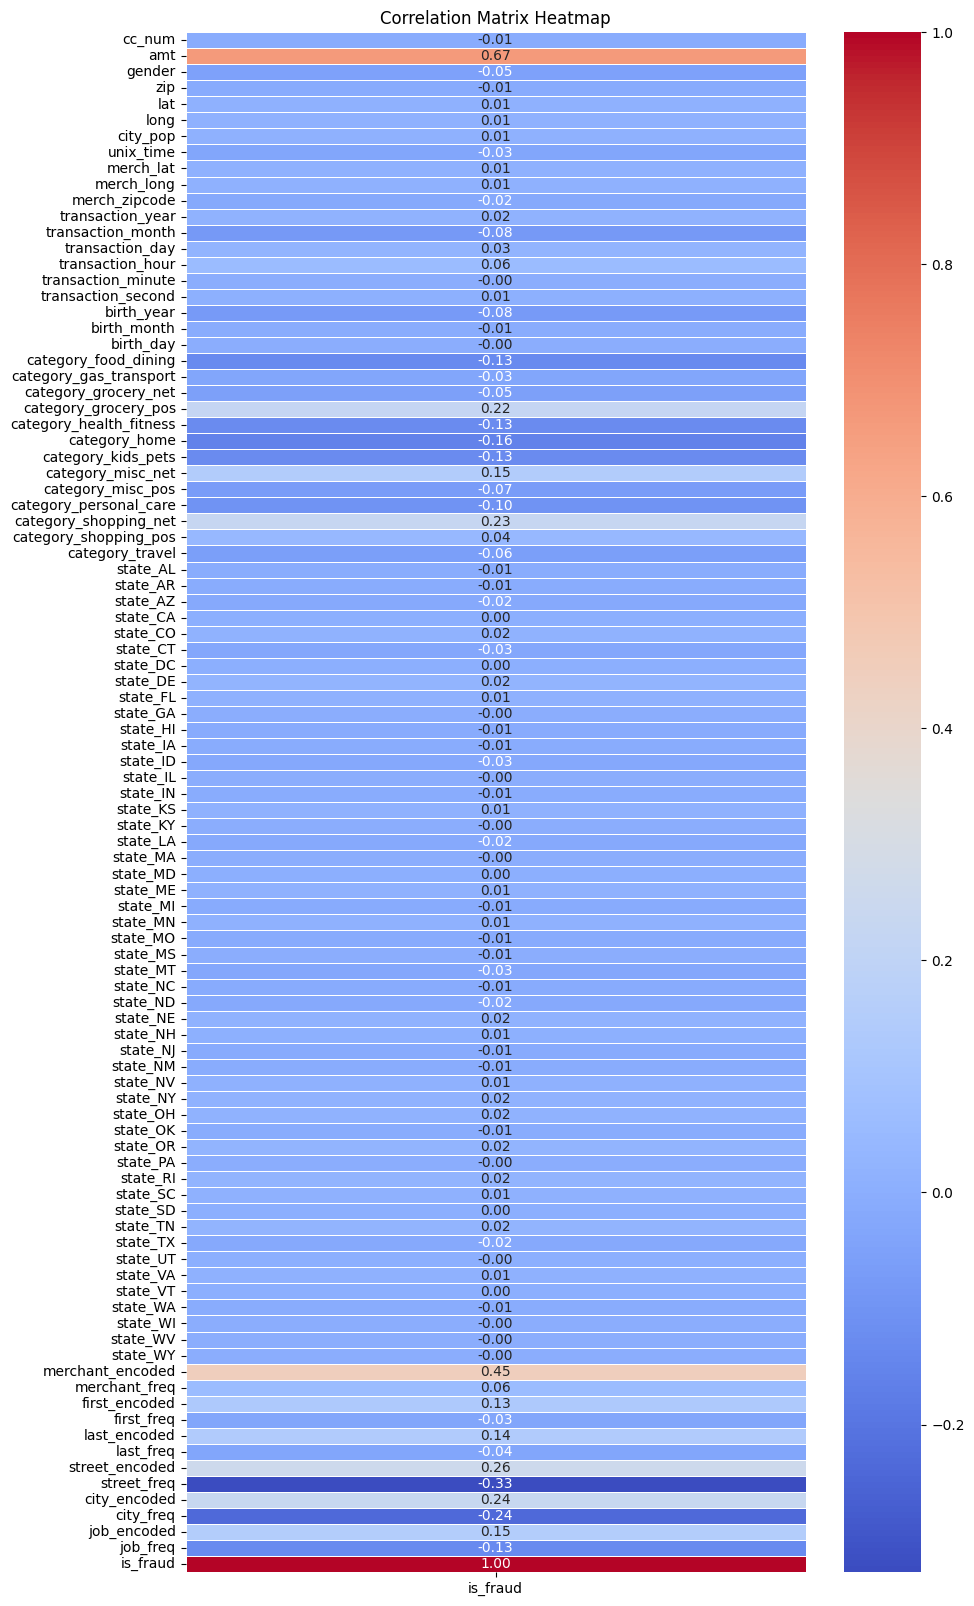

In [20]:
import numpy as np

# Visualize the correlation matrix excluding non-numeric columns

df_smoted = pd.concat([X_smote, y_smote], axis = 1)
correlation_matrix = df_smoted.corr()

# Filter to only the 'is_fraud' column
is_fraud_corr = correlation_matrix[['is_fraud']]

plt.figure(figsize=(10, 20))
sns.heatmap(is_fraud_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()